# **Employee Burnout Analysis Project**

The dataset consists of 9 columns as follows:



*  **Employee Id :** The unique ID allocated to each employee
*  **Date of Joining :** The date when the employee has joined the organisation


*  **Gender :** The gender of the employee

*   **Company Type:** The type of the company where the employee is working


*   **WFH Setup Available :** Whether the person wis working from home or office

*   **Designation:** The designation of the employee at work


*   **Mental Fatigue Score**: The level of Fatigue experienced by employees mentally lying in the range of [0.0,10.0], 0.0 meaing no fatigue while 10.0 meanse completely fatigue

*   **Burn Rate :** The value needed to predict the rate of burnout in each employee while working ranging from [0.0,1.0] where the higher the value is, more is the burn out.









In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Data Checking

In [2]:
data = pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [5]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [6]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [7]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [10]:
data.isnull().sum().values.sum()

4622

In [11]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [12]:
data=data.dropna()

In [13]:
data.shape

(18590, 9)

In [14]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [15]:
data=data.drop('Employee ID' , axis=1)

In [16]:
print(f"Minimum Date {data['Date of Joining'].min()}")
print(f"Maximum Date {data['Date of Joining'].max()}")
date_month = data.copy()

Minimum Date 2008-01-01 00:00:00
Maximum Date 2008-12-31 00:00:00


In [17]:
data_date = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data["Date of Joining"].astype("datetime64[ns]").sub(data_date).dt.days
data.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [18]:
num_data=data.select_dtypes(include=['number'])
correl=num_data.corr()["Burn Rate"]
print(correl)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [19]:
data = data.drop(["Date of Joining","Days"], axis = 1)

In [20]:
data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...
22743,Female,Product,Yes,1,3.0,6.0,0.48
22744,Male,Product,No,3,7.0,6.2,0.54
22746,Female,Product,Yes,3,6.0,6.7,0.59
22748,Female,Service,No,2,5.0,5.9,0.52


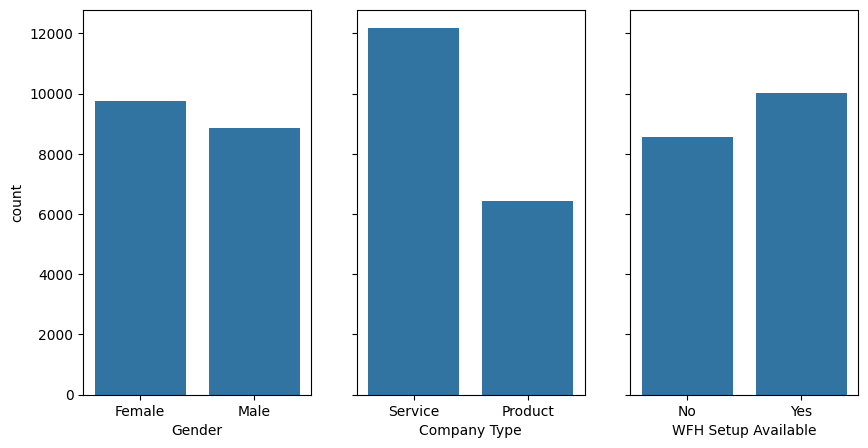

In [21]:
category_col = data.select_dtypes(object).columns
fig,ax = plt.subplots(nrows=1,ncols=len(category_col),sharey=True,figsize=(10,5))
for i,c in enumerate(category_col):
  sns.countplot(x=c,data=data,ax=ax[i])
plt.show()

In [22]:
if all(col in data.columns for col in ['Company Type','WFH Setup Available','Gender']):
  data = pd.get_dummies(data,columns=['Company Type','WFH Setup Available','Gender'],drop_first=True)
  data.head()
  encoded_columns=data.columns
else:
  print("Error:One or More of the specified columns are not present in the DataFrame.")
  print(data.columns)

In [23]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


In [24]:
y = data['Burn Rate']
x = data.drop('Burn Rate',axis = 1)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,shuffle = True,random_state=1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),index = x_test.index,columns = x_test.columns)

In [26]:
x_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [27]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


So far, we have structuded the data and will mode further with the model building.

# **Model Building**

## Linear Regression

In [29]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train) #training the model

LinearRegression()

In [35]:
#Linear Regression Model performance testing
print("Linear Regression Model Performance Metrics:\n")

y_pred = lr_model.predict(x_test)

msqe = mean_squared_error(y_test,y_pred)
print(" Mean Squared Error:",msqe)

rmsqe = np.sqrt(msqe)
print("Root Mean Squared Error:",rmsqe)

mabe = mean_absolute_error(y_test,y_pred)
print(" Mean Absolute Error:",mabe)

r2 = r2_score(y_test,y_pred)
print(" R-Squared Error:",r2)

Linear Regression Model Performance Metrics:

 Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
 Mean Absolute Error: 0.04595032032644773
 R-Squared Error: 0.918822674247248


# KNN Model

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [38]:
y_predKnn= knn_regressor.predict(x_test)

In [40]:
#KNN performance testing
print("KNN Model Performance Metrics:\n")

msqeKnn = mean_squared_error(y_test,y_predKnn)
print(" Mean Squared Error:",msqeKnn)

rmsqeKnn = np.sqrt(msqeKnn)
print("Root Mean Squared Error:",rmsqeKnn)

mabeKnn = mean_absolute_error(y_test,y_predKnn)
print(" Mean Absolute Error:",mabeKnn)

r2Knn = r2_score(y_test,y_predKnn)
print(" R-Squared Error:",r2Knn)

KNN Model Performance Metrics:

 Mean Squared Error: 0.00338130966469428
Root Mean Squared Error: 0.05814902978291452
 Mean Absolute Error: 0.04616496324188633
 R-Squared Error: 0.9130542931155712


# Support Vector Regression (SVR)

In [43]:
from sklearn.svm import SVR

In [47]:
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_regressor.fit(x_train, y_train)
y_predsvr = svr_regressor.predict(x_test)

In [48]:
print("SVR Model Performance Metrics:\n")

msqesvr = mean_squared_error(y_test,y_predsvr)
print(" Mean Squared Error:",msqesvr)

rmsqesvr = np.sqrt(msqesvr)
print("Root Mean Squared Error:",rmsqesvr)

mabesvr = mean_absolute_error(y_test,y_predsvr)
print(" Mean Absolute Error:",mabesvr)

r2svr = r2_score(y_test,y_predsvr)
print(" R-Squared Error:",r2svr)


SVR Model Performance Metrics:

 Mean Squared Error: 0.00341204574122986
Root Mean Squared Error: 0.058412719002199
 Mean Absolute Error: 0.04962241383880883
 R-Squared Error: 0.9122639573681112


## **Comparison of Models**

In [50]:
# Collect metrics
performance_metrics = {
    "Model": ["Linear Regression", "KNN Regression","Support Vector Regression (SVR) "],
    "MSE": [msqe, msqeKnn, msqesvr],
    "RMSE": [rmsqe, rmsqeKnn, rmsqesvr],
    "MAE": [mabe, mabeKnn, mabesvr],
    "R²": [r2, r2Knn, r2svr],
}

comparison_df = pd.DataFrame(performance_metrics)
print(comparison_df)


               Model       MSE      RMSE       MAE        R²
0  Linear Regression  0.003157  0.056187  0.045950  0.918823
1     KNN Regression  0.003381  0.058149  0.046165  0.913054
2                SVR  0.003412  0.058413  0.049622  0.912264


based on the evaluation metrics The linear regression model appears tp be the best model for predicting burnout analysis

It has the lowest mean squared error, root mean squared error and mean absolute rror indicating better accuracy and precision than other models. Also, it has high R^2 score, indicating a good fit to tha data.
Hence, we are choosing Linear Regression Model.